In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('L95_Solution_Camp_2_10_100_No_control.csv')

TypeError: parser_f() got an unexpected keyword argument 'index'

In [12]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Susceptible,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths,Time
0,0.999997,0.000000,0.000003,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0
1,0.999992,0.000002,0.000002,0.000002,8.998615e-07,2.109896e-08,2.988875e-10,5.317129e-11,0.000002,5.317129e-11,1.0
2,0.999986,0.000003,0.000002,0.000002,1.713046e-06,3.766124e-08,9.420031e-10,3.549337e-10,0.000002,3.017625e-10,2.0
3,0.999979,0.000004,0.000002,0.000002,2.507351e-06,5.181310e-08,1.711306e-09,1.015564e-09,0.000002,6.606302e-10,3.0
4,0.999969,0.000004,0.000002,0.000002,3.325171e-06,6.483361e-08,2.515383e-09,2.071724e-09,0.000002,1.056160e-09,4.0


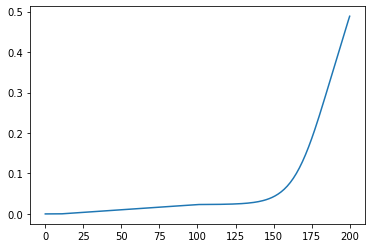

In [18]:
data.Recovered.plot(kind = 'line')